In [1]:
%matplotlib inline

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import time
from NAIVE import NaiveBayesClassifier


# NAIVE BAYES

The model Naive Bayes is applied and its implementation is in the file 'NAIVE.py'

In [2]:
# Retrieving the DataFrame
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
# Printing their shape
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 719)
y_train shape: (60000, 1)
X_test shape: (10000, 719)
y_test shape: (10000, 1)


In [4]:
def cv10_nb(X_train, X_test, y_train, y_test):
    
    # Creation of the model
    model = NaiveBayesClassifier()
    
    # Fitting the best model on the whole training set
    print("Fitting ...")
    start_fit = time.time()
    model.fit(X_train, y_train)
    end_fit = time.time()
    time_fit = end_fit - start_fit

    # Predicting on the test set
    print("Predicting ...")
    start_predict = time.time()
    y_pred_test = model.predict(X_test)
    end_predict = time.time()
    test_acc = accuracy_score(y_true = y_test, y_pred = y_pred_test)    
    time_predict = end_predict - start_predict
    
    time_count = [time_fit, time_predict]

    return test_acc, y_pred_test, time_count


In [5]:
test_acc, y_pred_test, time_count = cv10_nb(X_train, X_test, y_train.to_numpy().ravel(), y_test.to_numpy().ravel())

Fitting ...
Predicting ...


In [6]:
print("Test accuracy: ", test_acc)
print("Time for the fit phase: ", time_count[0])
print("Time for the predict phase: ", time_count[1])

Test accuracy:  0.8433
Time for the fit phase:  0.7889325618743896
Time for the predict phase:  99.7838065624237


<Axes: >

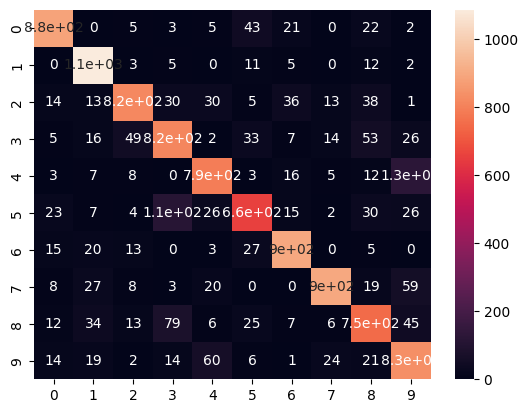

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf_matrix, annot=True)